In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import pyplot
import matplotlib.image as pltimg
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
url = 'https://raw.githubusercontent.com/jufemachado/TFM/main/Dataset_tfm.csv'
dataset = pd.read_csv(url, sep= ';')
dataset

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult,Range
0,Afghanistan,2012,Asia-Pacific,Low-income,599.0,14601059.0,11010439.8,2.110,41.0,Gold,Mining,41.00,380.0,2.60420,2.48,NaN,NaN,NaN
1,Afghanistan,2013,Asia-Pacific,Low-income,627.0,14748545.0,11849016.3,2.550,39.0,Gold,Mining,41.00,380.0,3.45446,2.48,NaN,NaN,NaN
2,Afghanistan,2014,Asia-Pacific,Low-income,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,Mining,41.00,380.0,3.69522,2.77,NaN,NaN,NaN
3,Afghanistan,2015,Asia-Pacific,Low-income,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,Mining,41.00,380.0,3.25580,2.77,NaN,NaN,NaN
4,Afghanistan,2016,Asia-Pacific,Low-income,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,Mining,41.00,380.0,4.54397,2.55,NaN,2500.0,Bet_1000_5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,Africa,Low-income,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.81878,3.16,60.429035,3640.0,Bet_1000_5000
2113,Zimbabwe,2018,Africa,Low-income,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,3216.0,Bet_1000_5000
2114,Zimbabwe,2019,Africa,Low-income,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,4734.0,Bet_1000_5000
2115,Zimbabwe,2020,Africa,Lower-middle-income,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,7131.0,Bet_5000_10000


In [3]:
dataset.describe()

,Period,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult
count,2117.000000,2026.000000,1.955000e+03,1.977000e+03,1947.000000,1817.000000,1746.000000,1574.000000,1815.000000,1883.000000,1636.000000,1898.000000
mean,2016.459613,21510.123514,2.500875e+07,8.726739e+07,39.953918,7439.842047,38.341827,17773.576874,4.495916,6.007451,29.223928,64144.819283
std,2.873827,30457.128366,9.842088e+07,2.404969e+08,31.927440,12586.634896,8.169891,27716.916097,1.924194,2.520218,13.246921,110618.856723
min,2012.000000,132.000000,1.800000e+04,1.845300e+04,0.550000,4.000000,23.230000,380.000000,0.127174,0.320000,7.909617,107.000000
25%,2014.000000,3244.750000,1.135534e+06,2.789410e+06,20.751500,643.000000,32.465000,1584.000000,3.200500,3.760000,20.220474,4261.250000
50%,2016.000000,9127.000000,4.636204e+06,1.022715e+07,32.325000,2112.000000,36.760000,4580.000000,4.343190,6.100000,27.668720,15929.000000
75%,2019.000000,26096.000000,1.505252e+07,5.227911e+07,49.215500,7373.000000,43.050000,21850.000000,5.464790,7.920000,36.391113,53407.750000
max,2021.000000,252879.000000,1.110492e+09,2.827817e+09,221.610000,100795.000000,63.030000,186080.000000,15.377000,10.000000,91.500000,998694.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           2117 non-null   object 
 1   Period            2117 non-null   int64  
 2   Region            2117 non-null   object 
 3   Income_Group      2117 non-null   object 
 4   GDP_per_adult     2026 non-null   float64
 5   Population        1955 non-null   float64
 6   Exports           1977 non-null   float64
 7   Exports_Ratio     1947 non-null   float64
 8   External_Debt     1817 non-null   float64
 9   Main_export       1933 non-null   object 
 10  Class             1933 non-null   object 
 11  Gini              1746 non-null   float64
 12  Average_Wage      1574 non-null   float64
 13  Exp_Education     1815 non-null   float64
 14  Democracy_level   1883 non-null   float64
 15  Informal_economy  1636 non-null   float64
 16  Wealth_per_adult  1898 non-null   float64


In [5]:

dataset["Region"].value_counts()

Region
Asia-Pacific     636
Africa           550
Europe           473
Latin-America    398
North-America     40
China             10
India             10
Name: count, dtype: int64

In [6]:
mapeo1 = {'Asia-Pacific':1,'Africa':2,'Europe':3,'Latin-America':4,'North-America':5,'India':6,'China':7}
dataset["Region"]=dataset["Region"].map(mapeo1)
dataset

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult,Range
0,Afghanistan,2012,1,Low-income,599.0,14601059.0,11010439.8,2.110,41.0,Gold,Mining,41.00,380.0,2.60420,2.48,NaN,NaN,NaN
1,Afghanistan,2013,1,Low-income,627.0,14748545.0,11849016.3,2.550,39.0,Gold,Mining,41.00,380.0,3.45446,2.48,NaN,NaN,NaN
2,Afghanistan,2014,1,Low-income,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,Mining,41.00,380.0,3.69522,2.77,NaN,NaN,NaN
3,Afghanistan,2015,1,Low-income,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,Mining,41.00,380.0,3.25580,2.77,NaN,NaN,NaN
4,Afghanistan,2016,1,Low-income,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,Mining,41.00,380.0,4.54397,2.55,NaN,2500.0,Bet_1000_5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,2,Low-income,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.81878,3.16,60.429035,3640.0,Bet_1000_5000
2113,Zimbabwe,2018,2,Low-income,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,3216.0,Bet_1000_5000
2114,Zimbabwe,2019,2,Low-income,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,4734.0,Bet_1000_5000
2115,Zimbabwe,2020,2,Lower-middle-income,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,7131.0,Bet_5000_10000


In [7]:
dataset["Income_Group"].value_counts()

Income_Group
High-income            663
Lower-middle-income    527
Upper-middle-income    464
Low-income             462
 High-income             1
Name: count, dtype: int64

In [8]:
mapeo2 = {'Low-income':1,'Lower-middle-income':2,'Upper-middle-income':3,'High-income':4}
dataset["Income_Group"]=dataset["Income_Group"].map(mapeo2)
dataset

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult,Range
0,Afghanistan,2012,1,1.0,599.0,14601059.0,11010439.8,2.110,41.0,Gold,Mining,41.00,380.0,2.60420,2.48,NaN,NaN,NaN
1,Afghanistan,2013,1,1.0,627.0,14748545.0,11849016.3,2.550,39.0,Gold,Mining,41.00,380.0,3.45446,2.48,NaN,NaN,NaN
2,Afghanistan,2014,1,1.0,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,Mining,41.00,380.0,3.69522,2.77,NaN,NaN,NaN
3,Afghanistan,2015,1,1.0,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,Mining,41.00,380.0,3.25580,2.77,NaN,NaN,NaN
4,Afghanistan,2016,1,1.0,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,Mining,41.00,380.0,4.54397,2.55,NaN,2500.0,Bet_1000_5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,2,1.0,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.81878,3.16,60.429035,3640.0,Bet_1000_5000
2113,Zimbabwe,2018,2,1.0,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,3216.0,Bet_1000_5000
2114,Zimbabwe,2019,2,1.0,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,4734.0,Bet_1000_5000
2115,Zimbabwe,2020,2,2.0,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,7131.0,Bet_5000_10000


In [9]:
dataset["Class"].value_counts()

Class
Mining       540
Petroleum    420
Food         303
Vehicles     188
Tech         165
Clothes      130
Products     118
Medical       69
Name: count, dtype: int64

In [10]:
mapeo3 = {'Mining':1,'Petroleum':2,'Food':3,'Vehicles':4,'Tech':5,'Clothes':6,'Products':7,'Medical':8}
dataset["Class"]=dataset["Class"].map(mapeo3)
dataset

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult,Range
0,Afghanistan,2012,1,1.0,599.0,14601059.0,11010439.8,2.110,41.0,Gold,1.0,41.00,380.0,2.60420,2.48,NaN,NaN,NaN
1,Afghanistan,2013,1,1.0,627.0,14748545.0,11849016.3,2.550,39.0,Gold,1.0,41.00,380.0,3.45446,2.48,NaN,NaN,NaN
2,Afghanistan,2014,1,1.0,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,1.0,41.00,380.0,3.69522,2.77,NaN,NaN,NaN
3,Afghanistan,2015,1,1.0,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,1.0,41.00,380.0,3.25580,2.77,NaN,NaN,NaN
4,Afghanistan,2016,1,1.0,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,1.0,41.00,380.0,4.54397,2.55,NaN,2500.0,Bet_1000_5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,2,1.0,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,1.0,44.34,1710.0,5.81878,3.16,60.429035,3640.0,Bet_1000_5000
2113,Zimbabwe,2018,2,1.0,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,1.0,50.26,1710.0,2.05049,3.16,60.429035,3216.0,Bet_1000_5000
2114,Zimbabwe,2019,2,1.0,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,1.0,50.26,1710.0,2.05049,3.16,60.429035,4734.0,Bet_1000_5000
2115,Zimbabwe,2020,2,2.0,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,1.0,50.26,1710.0,2.05049,3.16,60.429035,7131.0,Bet_5000_10000


In [11]:
dataset.isna().sum()

Country               0
Period                0
Region                0
Income_Group          1
GDP_per_adult        91
Population          162
Exports             140
Exports_Ratio       170
External_Debt       300
Main_export         184
Class               184
Gini                371
Average_Wage        543
Exp_Education       302
Democracy_level     234
Informal_economy    481
Wealth_per_adult    219
Range               219
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           2117 non-null   object 
 1   Period            2117 non-null   int64  
 2   Region            2117 non-null   int64  
 3   Income_Group      2116 non-null   float64
 4   GDP_per_adult     2026 non-null   float64
 5   Population        1955 non-null   float64
 6   Exports           1977 non-null   float64
 7   Exports_Ratio     1947 non-null   float64
 8   External_Debt     1817 non-null   float64
 9   Main_export       1933 non-null   object 
 10  Class             1933 non-null   float64
 11  Gini              1746 non-null   float64
 12  Average_Wage      1574 non-null   float64
 13  Exp_Education     1815 non-null   float64
 14  Democracy_level   1883 non-null   float64
 15  Informal_economy  1636 non-null   float64
 16  Wealth_per_adult  1898 non-null   float64


In [13]:
dataset_no_null = dataset.dropna(subset=['Income_Group']) 
dataset_no_null = dataset_no_null.dropna(subset=['GDP_per_adult']) 
dataset_no_null = dataset_no_null.dropna(subset=['Wealth_per_adult']) 
dataset_no_null = dataset_no_null.dropna(subset=['Population']) 
dataset_no_null = dataset_no_null.dropna(subset=['Exports']) 
dataset_no_null = dataset_no_null.dropna(subset=['Exports_Ratio']) 
dataset_no_null = dataset_no_null.dropna(subset=['External_Debt']) 
dataset_no_null = dataset_no_null.dropna(subset=['Class']) 
dataset_no_null = dataset_no_null.dropna(subset=['Gini']) 
dataset_no_null = dataset_no_null.dropna(subset=['Average_Wage']) 
dataset_no_null = dataset_no_null.dropna(subset=['Exp_Education']) 
dataset_no_null = dataset_no_null.dropna(subset=['Democracy_level']) 
dataset_no_null = dataset_no_null.dropna(subset=['Informal_economy']) 



In [14]:
dataset_no_null.isna().sum()

Country             0
Period              0
Region              0
Income_Group        0
GDP_per_adult       0
Population          0
Exports             0
Exports_Ratio       0
External_Debt       0
Main_export         0
Class               0
Gini                0
Average_Wage        0
Exp_Education       0
Democracy_level     0
Informal_economy    0
Wealth_per_adult    0
Range               0
dtype: int64

In [15]:
dataset_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1377 entries, 10 to 2116
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           1377 non-null   object 
 1   Period            1377 non-null   int64  
 2   Region            1377 non-null   int64  
 3   Income_Group      1377 non-null   float64
 4   GDP_per_adult     1377 non-null   float64
 5   Population        1377 non-null   float64
 6   Exports           1377 non-null   float64
 7   Exports_Ratio     1377 non-null   float64
 8   External_Debt     1377 non-null   float64
 9   Main_export       1377 non-null   object 
 10  Class             1377 non-null   float64
 11  Gini              1377 non-null   float64
 12  Average_Wage      1377 non-null   float64
 13  Exp_Education     1377 non-null   float64
 14  Democracy_level   1377 non-null   float64
 15  Informal_economy  1377 non-null   float64
 16  Wealth_per_adult  1377 non-null   float64
 17 

In [16]:
dataset_no_null = dataset_no_null.drop ('Country', axis = 1)
dataset_no_null = dataset_no_null.drop ('Period', axis = 1)
dataset_no_null = dataset_no_null.drop ('Main_export', axis = 1)
dataset_no_null = dataset_no_null.drop ('Range', axis = 1)

In [17]:
dataset_no_null.describe()

,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult
count,1377.000000,1377.000000,1377.000000,1.377000e+03,1.377000e+03,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,2.382716,2.498184,19705.452106,3.313079e+07,1.144355e+08,39.701596,8440.419753,3.156863,37.521336,16555.124183,4.403651,5.914270,28.964342,66035.248366
std,1.160552,1.143182,26764.125373,1.160016e+08,2.769685e+08,30.104359,13954.724314,2.147558,7.908912,23289.135471,1.584126,2.205769,13.311240,112974.814124
min,1.000000,1.000000,132.000000,4.823200e+04,1.753841e+05,2.140000,57.000000,1.000000,23.230000,432.000000,1.190000,1.260000,7.909617,107.000000
25%,1.000000,1.000000,2577.000000,2.943733e+06,5.286161e+06,21.446000,584.000000,1.000000,32.040000,1640.000000,3.271860,3.930000,19.995632,3640.000000
50%,2.000000,2.000000,8213.000000,7.053320e+06,1.924038e+07,31.570000,2159.000000,3.000000,35.760000,4836.000000,4.301510,6.180000,27.330679,14873.000000
75%,3.000000,4.000000,23426.000000,2.114114e+07,8.403909e+07,47.383000,8147.000000,5.000000,42.350000,21850.000000,5.410220,7.740000,36.470005,57835.000000
max,7.000000,4.000000,164681.000000,1.110492e+09,2.827817e+09,213.223000,100795.000000,8.000000,63.030000,95490.000000,10.315000,10.000000,91.500000,696604.000000


In [18]:
dataset_no_null_rnd = dataset_no_null

In [19]:
dataset_no_null['class_wealth'] = dataset_no_null['Wealth_per_adult'].apply(lambda x: 1 if x < 1000 
                                                                            else ( 2 if 1000 <= x <= 4999 
                                                                                  else (3 if 5000 <= x <= 9999 
                                                                                        else (4 if 10000 <= x <= 19999 
                                                                                              else(5 if 20000 <= x <= 39999 
                                                                                                   else(6 if 40000 <= x <= 69999
                                                                                                       else(7 if 70000 <= x <= 99999
                                                                                                           else(8 if 100000 <= x <= 199999
                                                                                                               else(9 if 200000 <= x <= 300000
                                                                                                                   else(10))))))))))

In [20]:
dataset_no_null = dataset_no_null.drop ('Wealth_per_adult', axis = 1)
dataset_no_null

,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,class_wealth
10,3,2.0,3943.0,2186662.0,4369918.6,28.937,2056.0,6.0,28.96,4836.0,3.309061,5.67,29.336660,3
11,3,2.0,3953.0,2208750.0,4493779.8,28.916,2343.0,6.0,34.60,4836.0,3.539300,5.67,29.336660,3
12,3,2.0,5827.0,2231060.0,4830065.7,28.213,2487.0,6.0,34.60,4836.0,3.216967,5.67,29.336660,4
13,3,2.0,5990.0,2295421.0,4128049.7,27.267,2631.0,6.0,32.75,4836.0,3.437970,5.91,29.336660,3
14,3,2.0,6169.0,2281617.0,4442951.6,28.978,2732.0,6.0,33.74,4836.0,3.962090,5.91,29.336660,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,2,1.0,2074.0,7967033.0,3550740.6,19.659,972.0,1.0,44.34,1710.0,5.818780,3.16,60.429035,2
2113,2,1.0,2515.0,8084577.0,3935783.6,26.164,1059.0,1.0,50.26,1710.0,2.050490,3.16,60.429035,2
2114,2,1.0,2893.0,8238276.0,3272076.8,27.554,1247.0,1.0,50.26,1710.0,2.050490,3.16,60.429035,2
2115,2,2.0,3048.0,7151872.0,3923835.5,22.293,1269.0,1.0,50.26,1710.0,2.050490,3.16,60.429035,3


In [21]:
dataset_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1377 entries, 10 to 2116
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1377 non-null   int64  
 1   Income_Group      1377 non-null   float64
 2   GDP_per_adult     1377 non-null   float64
 3   Population        1377 non-null   float64
 4   Exports           1377 non-null   float64
 5   Exports_Ratio     1377 non-null   float64
 6   External_Debt     1377 non-null   float64
 7   Class             1377 non-null   float64
 8   Gini              1377 non-null   float64
 9   Average_Wage      1377 non-null   float64
 10  Exp_Education     1377 non-null   float64
 11  Democracy_level   1377 non-null   float64
 12  Informal_economy  1377 non-null   float64
 13  class_wealth      1377 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 161.4 KB


In [22]:
dataset_no_null.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Region,1377.0,2.382716e+00,1.160552e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
Income_Group,1377.0,2.498184e+00,1.143182e+00,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
GDP_per_adult,1377.0,1.970545e+04,2.676413e+04,132.000000,2.577000e+03,8.213000e+03,2.342600e+04,1.646810e+05
Population,1377.0,3.313079e+07,1.160016e+08,48232.000000,2.943733e+06,7.053320e+06,2.114114e+07,1.110492e+09
Exports,1377.0,1.144355e+08,2.769685e+08,175384.100000,5.286161e+06,1.924038e+07,8.403909e+07,2.827817e+09
Exports_Ratio,1377.0,3.970160e+01,3.010436e+01,2.140000,2.144600e+01,3.157000e+01,4.738300e+01,2.132230e+02
External_Debt,1377.0,8.440420e+03,1.395472e+04,57.000000,5.840000e+02,2.159000e+03,8.147000e+03,1.007950e+05
Class,1377.0,3.156863e+00,2.147558e+00,1.000000,1.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00
Gini,1377.0,3.752134e+01,7.908912e+00,23.230000,3.204000e+01,3.576000e+01,4.235000e+01,6.303000e+01
Average_Wage,1377.0,1.655512e+04,2.328914e+04,432.000000,1.640000e+03,4.836000e+03,2.185000e+04,9.549000e+04


In [23]:
array = dataset_no_null.values
X = array[:,0:13]
y = array[:,13]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [24]:
Y_validation.size

276

In [25]:
np.unique(Y_validation)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [26]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [27]:
normalizer.adapt(np.array(X_train))

In [28]:
print(normalizer.mean.numpy())

[[2.4023616e+00 2.4895554e+00 1.9325445e+04 3.4715144e+07 1.1555694e+08
  3.9322029e+01 8.2867578e+03 3.1371474e+00 3.7548523e+01 1.6113294e+04
  4.4009004e+00 5.8946958e+00 2.9297966e+01]]


In [29]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[       3.          2.       6408.    7269390.   32582572.4        58.33
      2213.          7.         26.58     7210.          5.01        3.04
        36.77]]

Normalized: [[ 0.51 -0.43 -0.49 -0.22 -0.29  0.64 -0.44  1.81 -1.39 -0.39  0.39 -1.3
   0.55]]


In [30]:
model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Flatten(input_shape=(11,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [32]:
history = model.fit(
    X_train, 
    Y_train,
    epochs=200,
    verbose=2
)

Epoch 1/200


35/35 - 2s - loss: 1.8590 - accuracy: 0.3597 - 2s/epoch - 64ms/step
Epoch 2/200
35/35 - 0s - loss: 1.2927 - accuracy: 0.4805 - 88ms/epoch - 3ms/step
Epoch 3/200
35/35 - 0s - loss: 1.1095 - accuracy: 0.5550 - 94ms/epoch - 3ms/step
Epoch 4/200
35/35 - 0s - loss: 1.0336 - accuracy: 0.5668 - 101ms/epoch - 3ms/step
Epoch 5/200
35/35 - 0s - loss: 0.9582 - accuracy: 0.5904 - 85ms/epoch - 2ms/step
Epoch 6/200
35/35 - 0s - loss: 0.9096 - accuracy: 0.6094 - 82ms/epoch - 2ms/step
Epoch 7/200
35/35 - 0s - loss: 0.8712 - accuracy: 0.6467 - 82ms/epoch - 2ms/step
Epoch 8/200
35/35 - 0s - loss: 0.8494 - accuracy: 0.6340 - 85ms/epoch - 2ms/step
Epoch 9/200
35/35 - 0s - loss: 0.8486 - accuracy: 0.6312 - 101ms/epoch - 3ms/step
Epoch 10/200
35/35 - 0s - loss: 0.8130 - accuracy: 0.6521 - 99ms/epoch - 3ms/step
Epoch 11/200
35/35 - 0s - loss: 0.7806 - accuracy: 0.6748 - 78ms/epoch - 2ms/step
Epoch 12/200
35/35 - 0s - loss: 0.7709 - accuracy: 0.6649 - 83ms/epoch - 2ms/step
Epoch 13/200
35/35 - 0

Epoch 95/200
35/35 - 0s - loss: 0.3219 - accuracy: 0.8583 - 114ms/epoch - 3ms/step
Epoch 96/200
35/35 - 0s - loss: 0.3228 - accuracy: 0.8529 - 111ms/epoch - 3ms/step
Epoch 97/200
35/35 - 0s - loss: 0.3346 - accuracy: 0.8501 - 80ms/epoch - 2ms/step
Epoch 98/200
35/35 - 0s - loss: 0.3052 - accuracy: 0.8683 - 90ms/epoch - 3ms/step
Epoch 99/200
35/35 - 0s - loss: 0.3168 - accuracy: 0.8601 - 83ms/epoch - 2ms/step
Epoch 100/200
35/35 - 0s - loss: 0.3060 - accuracy: 0.8619 - 103ms/epoch - 3ms/step
Epoch 101/200
35/35 - 0s - loss: 0.3094 - accuracy: 0.8719 - 112ms/epoch - 3ms/step
Epoch 102/200
35/35 - 0s - loss: 0.3076 - accuracy: 0.8656 - 132ms/epoch - 4ms/step
Epoch 103/200
35/35 - 0s - loss: 0.3101 - accuracy: 0.8592 - 120ms/epoch - 3ms/step
Epoch 104/200
35/35 - 0s - loss: 0.2820 - accuracy: 0.8765 - 130ms/epoch - 4ms/step
Epoch 105/200
35/35 - 0s - loss: 0.3083 - accuracy: 0.8647 - 126ms/epoch - 4ms/step
Epoch 106/200
35/35 - 0s - loss: 0.3111 - accuracy: 0.8656 - 106ms/epoch - 3ms/step


35/35 - 0s - loss: 0.2132 - accuracy: 0.9110 - 135ms/epoch - 4ms/step
Epoch 194/200
35/35 - 0s - loss: 0.1996 - accuracy: 0.9155 - 137ms/epoch - 4ms/step
Epoch 195/200
35/35 - 0s - loss: 0.2077 - accuracy: 0.9155 - 124ms/epoch - 4ms/step
Epoch 196/200
35/35 - 0s - loss: 0.1917 - accuracy: 0.9219 - 93ms/epoch - 3ms/step
Epoch 197/200
35/35 - 0s - loss: 0.2008 - accuracy: 0.9092 - 138ms/epoch - 4ms/step
Epoch 198/200
35/35 - 0s - loss: 0.2047 - accuracy: 0.9110 - 95ms/epoch - 3ms/step
Epoch 199/200
35/35 - 0s - loss: 0.2074 - accuracy: 0.9173 - 101ms/epoch - 3ms/step
Epoch 200/200
35/35 - 0s - loss: 0.1951 - accuracy: 0.9146 - 71ms/epoch - 2ms/step


In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
195,0.191731,0.921889,195
196,0.200807,0.909173,196
197,0.204730,0.910990,197
198,0.207432,0.917348,198
199,0.195135,0.914623,199


In [34]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [class_wealth]')
  plt.legend()
  plt.grid(True)

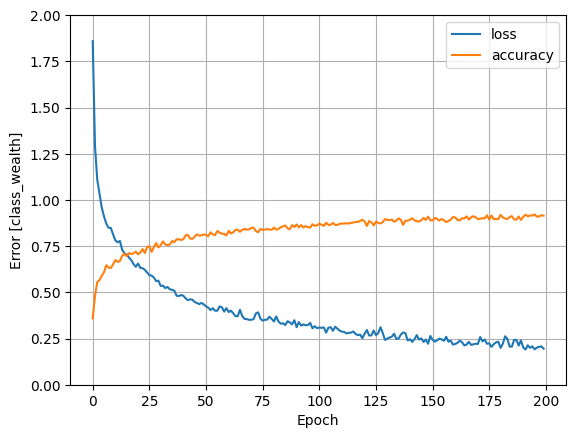

In [35]:
plot_loss(history)

In [36]:
test_loss, test_acc = model.evaluate(X_validation,  Y_validation, verbose=2)

print('\nTest accuracy:', test_acc)

9/9 - 0s - loss: 0.9677 - accuracy: 0.7391 - 329ms/epoch - 37ms/step

Test accuracy: 0.739130437374115


In [37]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [38]:
predictions = probability_model.predict(X_validation)

9/9 [==============================] - 0s 2ms/step


In [39]:
predictions[0]

array([0.07863034, 0.07863034, 0.07863034, 0.07863034, 0.07863128,
       0.2136718 , 0.07865425, 0.07863034, 0.07863034, 0.07863034,
       0.07863034], dtype=float32)

In [40]:
np.argmax(predictions[0])

5

In [41]:
model_r =  DecisionTreeClassifier()
model_r.fit(X_train, Y_train)
predictions_r = model_r.predict(X_validation)

In [42]:
print(model_r)

DecisionTreeClassifier()


In [43]:
print(accuracy_score(Y_validation, predictions_r))

0.7463768115942029


In [44]:
print(confusion_matrix(Y_validation, predictions_r))

[[28  3  0  0  0  0  0  0  0  0]
 [ 3 49  4  3  0  0  0  0  0  0]
 [ 0  8 14  2  0  0  0  0  0  0]
 [ 0  0  8 22  6  0  0  0  0  0]
 [ 0  1  2  3 27  2  1  0  0  0]
 [ 0  0  0  0  7 12  3  0  0  0]
 [ 0  0  0  0  2  1  2  0  0  0]
 [ 0  0  0  1  0  0  0 17  2  0]
 [ 0  0  0  0  0  0  0  3 16  5]
 [ 0  0  0  0  0  0  0  0  0 19]]


In [45]:
print(classification_report(Y_validation, predictions_r))

              precision    recall  f1-score   support

         1.0       0.90      0.90      0.90        31
         2.0       0.80      0.83      0.82        59
         3.0       0.50      0.58      0.54        24
         4.0       0.71      0.61      0.66        36
         5.0       0.64      0.75      0.69        36
         6.0       0.80      0.55      0.65        22
         7.0       0.33      0.40      0.36         5
         8.0       0.85      0.85      0.85        20
         9.0       0.89      0.67      0.76        24
        10.0       0.79      1.00      0.88        19

    accuracy                           0.75       276
   macro avg       0.72      0.71      0.71       276
weighted avg       0.76      0.75      0.75       276



In [46]:
#data = tree.export_graphviz(model_r, out_file=None, feature_names=dataset.columns.values[0:13], class_names=["1", "2", "3","4","5","6","7", "8", "9","10"], filled=True, rounded=True, special_characters=True)

#graph = pydotplus.graph_from_dot_data(data)
#graph.write_png('mydecisiontree_TFM.png')

#img = pltimg.imread('mydecisiontree_TFM.png')
#imgplot = plt.imshow(img)
#plt.show()

In [47]:
dataset_no_null_rnd['class_wealth'] = dataset_no_null_rnd['Wealth_per_adult'].apply(lambda x: 'Low_1000' if x < 1000 
                                                                            else ( 'Bet_1000_5000' if 1000 <= x <= 4999 
                                                                                  else ('Bet_5000_10000' if 5000 <= x <= 9999 
                                                                                        else ('Bet_10000_20000' if 10000 <= x <= 19999 
                                                                                              else('Bet_20000_40000' if 20000 <= x <= 39999 
                                                                                                   else('Bet_40000_70000' if 40000 <= x <= 69999
                                                                                                       else('Bet_70000_100000' if 70000 <= x <= 99999
                                                                                                           else('Bet_100000_200000' if 100000 <= x <= 199999
                                                                                                               else('Bet_200000_300000' if 200000 <= x <= 300000
                                                                                                                   else('Over_300000'))))))))))

In [48]:
dataset_no_null_rnd

,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult,class_wealth
10,3,2.0,3943.0,2186662.0,4369918.6,28.937,2056.0,6.0,28.96,4836.0,3.309061,5.67,29.336660,9689.0,Bet_5000_10000
11,3,2.0,3953.0,2208750.0,4493779.8,28.916,2343.0,6.0,34.60,4836.0,3.539300,5.67,29.336660,9450.0,Bet_5000_10000
12,3,2.0,5827.0,2231060.0,4830065.7,28.213,2487.0,6.0,34.60,4836.0,3.216967,5.67,29.336660,10309.0,Bet_10000_20000
13,3,2.0,5990.0,2295421.0,4128049.7,27.267,2631.0,6.0,32.75,4836.0,3.437970,5.91,29.336660,8713.0,Bet_5000_10000
14,3,2.0,6169.0,2281617.0,4442951.6,28.978,2732.0,6.0,33.74,4836.0,3.962090,5.91,29.336660,9204.0,Bet_5000_10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,2,1.0,2074.0,7967033.0,3550740.6,19.659,972.0,1.0,44.34,1710.0,5.818780,3.16,60.429035,3640.0,Bet_1000_5000
2113,2,1.0,2515.0,8084577.0,3935783.6,26.164,1059.0,1.0,50.26,1710.0,2.050490,3.16,60.429035,3216.0,Bet_1000_5000
2114,2,1.0,2893.0,8238276.0,3272076.8,27.554,1247.0,1.0,50.26,1710.0,2.050490,3.16,60.429035,4734.0,Bet_1000_5000
2115,2,2.0,3048.0,7151872.0,3923835.5,22.293,1269.0,1.0,50.26,1710.0,2.050490,3.16,60.429035,7131.0,Bet_5000_10000


In [49]:
model2 = RandomForestClassifier(n_estimators=100)

In [50]:
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [51]:
print(model2)

RandomForestClassifier()


In [52]:
predictions2 = model2.predict(X_validation)

In [53]:
print(accuracy_score(Y_validation, predictions2))

0.7862318840579711


In [54]:
print(confusion_matrix(Y_validation, predictions2))

[[30  1  0  0  0  0  0  0  0  0]
 [ 1 51  7  0  0  0  0  0  0  0]
 [ 0  5 16  3  0  0  0  0  0  0]
 [ 0  1  5 25  5  0  0  0  0  0]
 [ 0  0  0  5 30  1  0  0  0  0]
 [ 0  0  0  0  7 12  3  0  0  0]
 [ 0  0  0  0  1  1  2  1  0  0]
 [ 0  0  0  0  0  0  0 18  2  0]
 [ 0  0  0  0  0  0  0  3 16  5]
 [ 0  0  0  0  0  0  0  0  2 17]]


In [55]:
print(recall_score(Y_validation, predictions2,average=None))

[0.96774194 0.86440678 0.66666667 0.69444444 0.83333333 0.54545455
 0.4        0.9        0.66666667 0.89473684]


In [56]:
print(classification_report(Y_validation, predictions2))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97        31
         2.0       0.88      0.86      0.87        59
         3.0       0.57      0.67      0.62        24
         4.0       0.76      0.69      0.72        36
         5.0       0.70      0.83      0.76        36
         6.0       0.86      0.55      0.67        22
         7.0       0.40      0.40      0.40         5
         8.0       0.82      0.90      0.86        20
         9.0       0.80      0.67      0.73        24
        10.0       0.77      0.89      0.83        19

    accuracy                           0.79       276
   macro avg       0.75      0.74      0.74       276
weighted avg       0.79      0.79      0.78       276



In [57]:
dataset_path = keras.utils.get_file("Dataset_tfm.csv", "https://raw.githubusercontent.com/jufemachado/TFM/main/Dataset_tfm.csv")
dataset_path

'C:\\Users\\Felipe\\.keras\\datasets\\Dataset_tfm.csv'

In [58]:
raw_dataset = pd.read_csv(dataset_path,
                      na_values = "?", comment='\t',
                      sep=";")

dataset_reg = raw_dataset.copy()
dataset_reg.tail()

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult
2112,Zimbabwe,2017,Africa,Low-income,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.818780e+09,3.16,6.042904e+09,3640.0
2113,Zimbabwe,2018,Africa,Low-income,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,3216.0
2114,Zimbabwe,2019,Africa,Low-income,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,4734.0
2115,Zimbabwe,2020,Africa,Lower-middle-income,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,7131.0
2116,Zimbabwe,2021,Africa,Lower-middle-income,4220.0,7251558.0,5347863.0,22.775,1136.0,Gold,Mining,50.26,1710.0,2.050490e+09,2.92,6.042904e+09,9791.0


In [59]:
mapeo11 = {'Asia-Pacific':1,'Africa':2,'Europe':3,'Latin-America':4,'North-America':5,'India':6,'China':7}
dataset_reg["Region"]=dataset_reg["Region"].map(mapeo11)
dataset_reg

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult
0,Afghanistan,2012,1,Low-income,599.0,14601059.0,11010439.8,2.110,41.0,Gold,Mining,41.00,380.0,2.604200e+09,2.48,NaN,NaN
1,Afghanistan,2013,1,Low-income,627.0,14748545.0,11849016.3,2.550,39.0,Gold,Mining,41.00,380.0,3.454460e+09,2.48,NaN,NaN
2,Afghanistan,2014,1,Low-income,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,Mining,41.00,380.0,3.695220e+09,2.77,NaN,NaN
3,Afghanistan,2015,1,Low-income,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,Mining,41.00,380.0,3.255800e+09,2.77,NaN,NaN
4,Afghanistan,2016,1,Low-income,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,Mining,41.00,380.0,4.543970e+09,2.55,NaN,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,2,Low-income,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.818780e+09,3.16,6.042904e+09,3640.0
2113,Zimbabwe,2018,2,Low-income,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,3216.0
2114,Zimbabwe,2019,2,Low-income,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,4734.0
2115,Zimbabwe,2020,2,Lower-middle-income,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,7131.0


In [60]:
mapeo22 = {'Low-income':1,'Lower-middle-income':2,'Upper-middle-income':3,'High-income':4}
dataset_reg["Income_Group"]=dataset_reg["Income_Group"].map(mapeo22)
dataset_reg

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult
0,Afghanistan,2012,1,1.0,599.0,14601059.0,11010439.8,2.110,41.0,Gold,Mining,41.00,380.0,2.604200e+09,2.48,NaN,NaN
1,Afghanistan,2013,1,1.0,627.0,14748545.0,11849016.3,2.550,39.0,Gold,Mining,41.00,380.0,3.454460e+09,2.48,NaN,NaN
2,Afghanistan,2014,1,1.0,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,Mining,41.00,380.0,3.695220e+09,2.77,NaN,NaN
3,Afghanistan,2015,1,1.0,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,Mining,41.00,380.0,3.255800e+09,2.77,NaN,NaN
4,Afghanistan,2016,1,1.0,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,Mining,41.00,380.0,4.543970e+09,2.55,NaN,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,2,1.0,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.818780e+09,3.16,6.042904e+09,3640.0
2113,Zimbabwe,2018,2,1.0,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,3216.0
2114,Zimbabwe,2019,2,1.0,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,4734.0
2115,Zimbabwe,2020,2,2.0,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,7131.0


In [61]:
dataset_reg

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult
0,Afghanistan,2012,1,1.0,599.0,14601059.0,11010439.8,2.110,41.0,Gold,Mining,41.00,380.0,2.604200e+09,2.48,NaN,NaN
1,Afghanistan,2013,1,1.0,627.0,14748545.0,11849016.3,2.550,39.0,Gold,Mining,41.00,380.0,3.454460e+09,2.48,NaN,NaN
2,Afghanistan,2014,1,1.0,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,Mining,41.00,380.0,3.695220e+09,2.77,NaN,NaN
3,Afghanistan,2015,1,1.0,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,Mining,41.00,380.0,3.255800e+09,2.77,NaN,NaN
4,Afghanistan,2016,1,1.0,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,Mining,41.00,380.0,4.543970e+09,2.55,NaN,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,2,1.0,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.818780e+09,3.16,6.042904e+09,3640.0
2113,Zimbabwe,2018,2,1.0,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,3216.0
2114,Zimbabwe,2019,2,1.0,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,4734.0
2115,Zimbabwe,2020,2,2.0,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,7131.0


In [62]:
mapeo33 = {'Mining':1,'Petroleum':2,'Food':3,'Vehicles':4,'Tech':5,'Clothes':6,'Products':7,'Medical':8}
dataset_reg["Class"]=dataset_reg["Class"].map(mapeo33)
dataset_reg

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult
0,Afghanistan,2012,1,1.0,599.0,14601059.0,11010439.8,2.110,41.0,Gold,1.0,41.00,380.0,2.604200e+09,2.48,NaN,NaN
1,Afghanistan,2013,1,1.0,627.0,14748545.0,11849016.3,2.550,39.0,Gold,1.0,41.00,380.0,3.454460e+09,2.48,NaN,NaN
2,Afghanistan,2014,1,1.0,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,1.0,41.00,380.0,3.695220e+09,2.77,NaN,NaN
3,Afghanistan,2015,1,1.0,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,1.0,41.00,380.0,3.255800e+09,2.77,NaN,NaN
4,Afghanistan,2016,1,1.0,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,1.0,41.00,380.0,4.543970e+09,2.55,NaN,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,2,1.0,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,1.0,44.34,1710.0,5.818780e+09,3.16,6.042904e+09,3640.0
2113,Zimbabwe,2018,2,1.0,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,1.0,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,3216.0
2114,Zimbabwe,2019,2,1.0,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,1.0,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,4734.0
2115,Zimbabwe,2020,2,2.0,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,1.0,50.26,1710.0,2.050490e+09,3.16,6.042904e+09,7131.0


In [63]:
dataset_reg = dataset_reg.dropna(subset=['Income_Group']) 
dataset_reg = dataset_reg.dropna(subset=['GDP_per_adult']) 
dataset_reg = dataset_reg.dropna(subset=['Wealth_per_adult']) 
dataset_reg = dataset_reg.dropna(subset=['Population']) 
dataset_reg = dataset_reg.dropna(subset=['Exports']) 
dataset_reg = dataset_reg.dropna(subset=['Exports_Ratio']) 
dataset_reg = dataset_reg.dropna(subset=['External_Debt']) 
dataset_reg = dataset_reg.dropna(subset=['Class']) 
dataset_reg = dataset_reg.dropna(subset=['Gini']) 
dataset_reg = dataset_reg.dropna(subset=['Average_Wage']) 
dataset_reg = dataset_reg.dropna(subset=['Exp_Education']) 
dataset_reg = dataset_reg.dropna(subset=['Democracy_level']) 
dataset_reg = dataset_reg.dropna(subset=['Informal_economy']) 

In [64]:
dataset_reg.isna().sum()

Country             0
Period              0
Region              0
Income_Group        0
GDP_per_adult       0
Population          0
Exports             0
Exports_Ratio       0
External_Debt       0
Main_export         0
Class               0
Gini                0
Average_Wage        0
Exp_Education       0
Democracy_level     0
Informal_economy    0
Wealth_per_adult    0
dtype: int64

In [65]:
dataset_reg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Period,1397.0,2.016522e+03,2.840127e+00,2012.00,2.014000e+03,2.017000e+03,2.019000e+03,2.021000e+03
Region,1397.0,2.377237e+00,1.153106e+00,1.00,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
Income_Group,1397.0,2.480315e+00,1.145787e+00,1.00,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
GDP_per_adult,1397.0,1.940077e+04,2.656294e+04,132.00,2.543000e+03,7.971000e+03,2.302700e+04,1.646810e+05
Population,1397.0,3.292742e+07,1.151973e+08,48232.00,2.929746e+06,7.053320e+06,2.175802e+07,1.110492e+09
Exports,1397.0,1.128763e+08,2.752819e+08,175384.10,5.231679e+06,1.857325e+07,8.251094e+07,2.827817e+09
Exports_Ratio,1397.0,3.972407e+01,2.991902e+01,2.14,2.156100e+01,3.160200e+01,4.746900e+01,2.132230e+02
External_Debt,1397.0,8.332929e+03,1.388352e+04,57.00,5.670000e+02,2.113000e+03,8.005000e+03,1.007950e+05
Class,1397.0,3.133142e+00,2.142027e+00,1.00,1.000000e+00,2.000000e+00,5.000000e+00,8.000000e+00
Gini,1397.0,3.770274e+01,8.024544e+00,23.23,3.213000e+01,3.592000e+01,4.253000e+01,6.303000e+01


In [66]:
dataset_reg = dataset_reg.drop ('Country', axis = 1)
dataset_reg = dataset_reg.drop ('Period', axis = 1)
dataset_reg = dataset_reg.drop ('Main_export', axis = 1)
dataset_reg = dataset_reg.drop ('Population', axis = 1)
dataset_reg = dataset_reg.drop ('Region', axis = 1)
dataset_reg = dataset_reg.drop ('Class', axis = 1)
dataset_reg = dataset_reg.drop ('Exp_Education', axis = 1)
dataset_reg = dataset_reg.drop ('Exports', axis = 1)
dataset_reg = dataset_reg.drop ('Average_Wage', axis = 1)

In [67]:
dataset_reg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income_Group,1397.0,2.480315e+00,1.145787e+00,1.00,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
GDP_per_adult,1397.0,1.940077e+04,2.656294e+04,132.00,2.543000e+03,7.971000e+03,2.302700e+04,1.646810e+05
Exports_Ratio,1397.0,3.972407e+01,2.991902e+01,2.14,2.156100e+01,3.160200e+01,4.746900e+01,2.132230e+02
External_Debt,1397.0,8.332929e+03,1.388352e+04,57.00,5.670000e+02,2.113000e+03,8.005000e+03,1.007950e+05
Gini,1397.0,3.770274e+01,8.024544e+00,23.23,3.213000e+01,3.592000e+01,4.253000e+01,6.303000e+01
Democracy_level,1397.0,5.871446e+00,2.219058e+00,1.26,3.830000e+00,6.110000e+00,7.690000e+00,1.000000e+01
Informal_economy,1397.0,2.615897e+09,1.607099e+09,17.00,1.538433e+09,2.642628e+09,3.573961e+09,9.136214e+09
Wealth_per_adult,1397.0,6.511663e+04,1.124216e+05,107.00,3.432000e+03,1.444300e+04,5.697200e+04,6.966040e+05


In [68]:
train_dataset_reg = dataset_reg.sample(frac=0.80,random_state=0)
test_dataset_reg = dataset_reg.drop(train_dataset_reg.index)

In [69]:
train_dataset_reg

,Income_Group,GDP_per_adult,Exports_Ratio,External_Debt,Gini,Democracy_level,Informal_economy,Wealth_per_adult
282,2.0,10024.0,63.807,1659.0,38.57,7.14,2.775566e+08,15892.0
328,2.0,3354.0,16.516,642.0,42.18,2.56,2.805442e+09,3490.0
1829,2.0,7502.0,40.432,1167.0,54.58,3.03,3.965512e+09,4219.0
640,4.0,63568.0,39.881,28164.0,27.74,9.25,1.582724e+09,183124.0
260,3.0,20187.0,12.900,5786.0,51.93,6.96,3.337725e+09,17597.0
...,...,...,...,...,...,...,...,...
885,3.0,7426.0,31.116,2159.0,37.42,2.45,1.617925e+08,4779.0
265,3.0,8938.0,16.454,5915.0,48.90,6.92,3.337725e+09,18272.0
290,1.0,684.0,27.077,141.0,35.30,4.15,3.088707e+09,1273.0
1699,4.0,65423.0,191.954,42997.0,33.70,6.03,1.077293e+09,289902.0


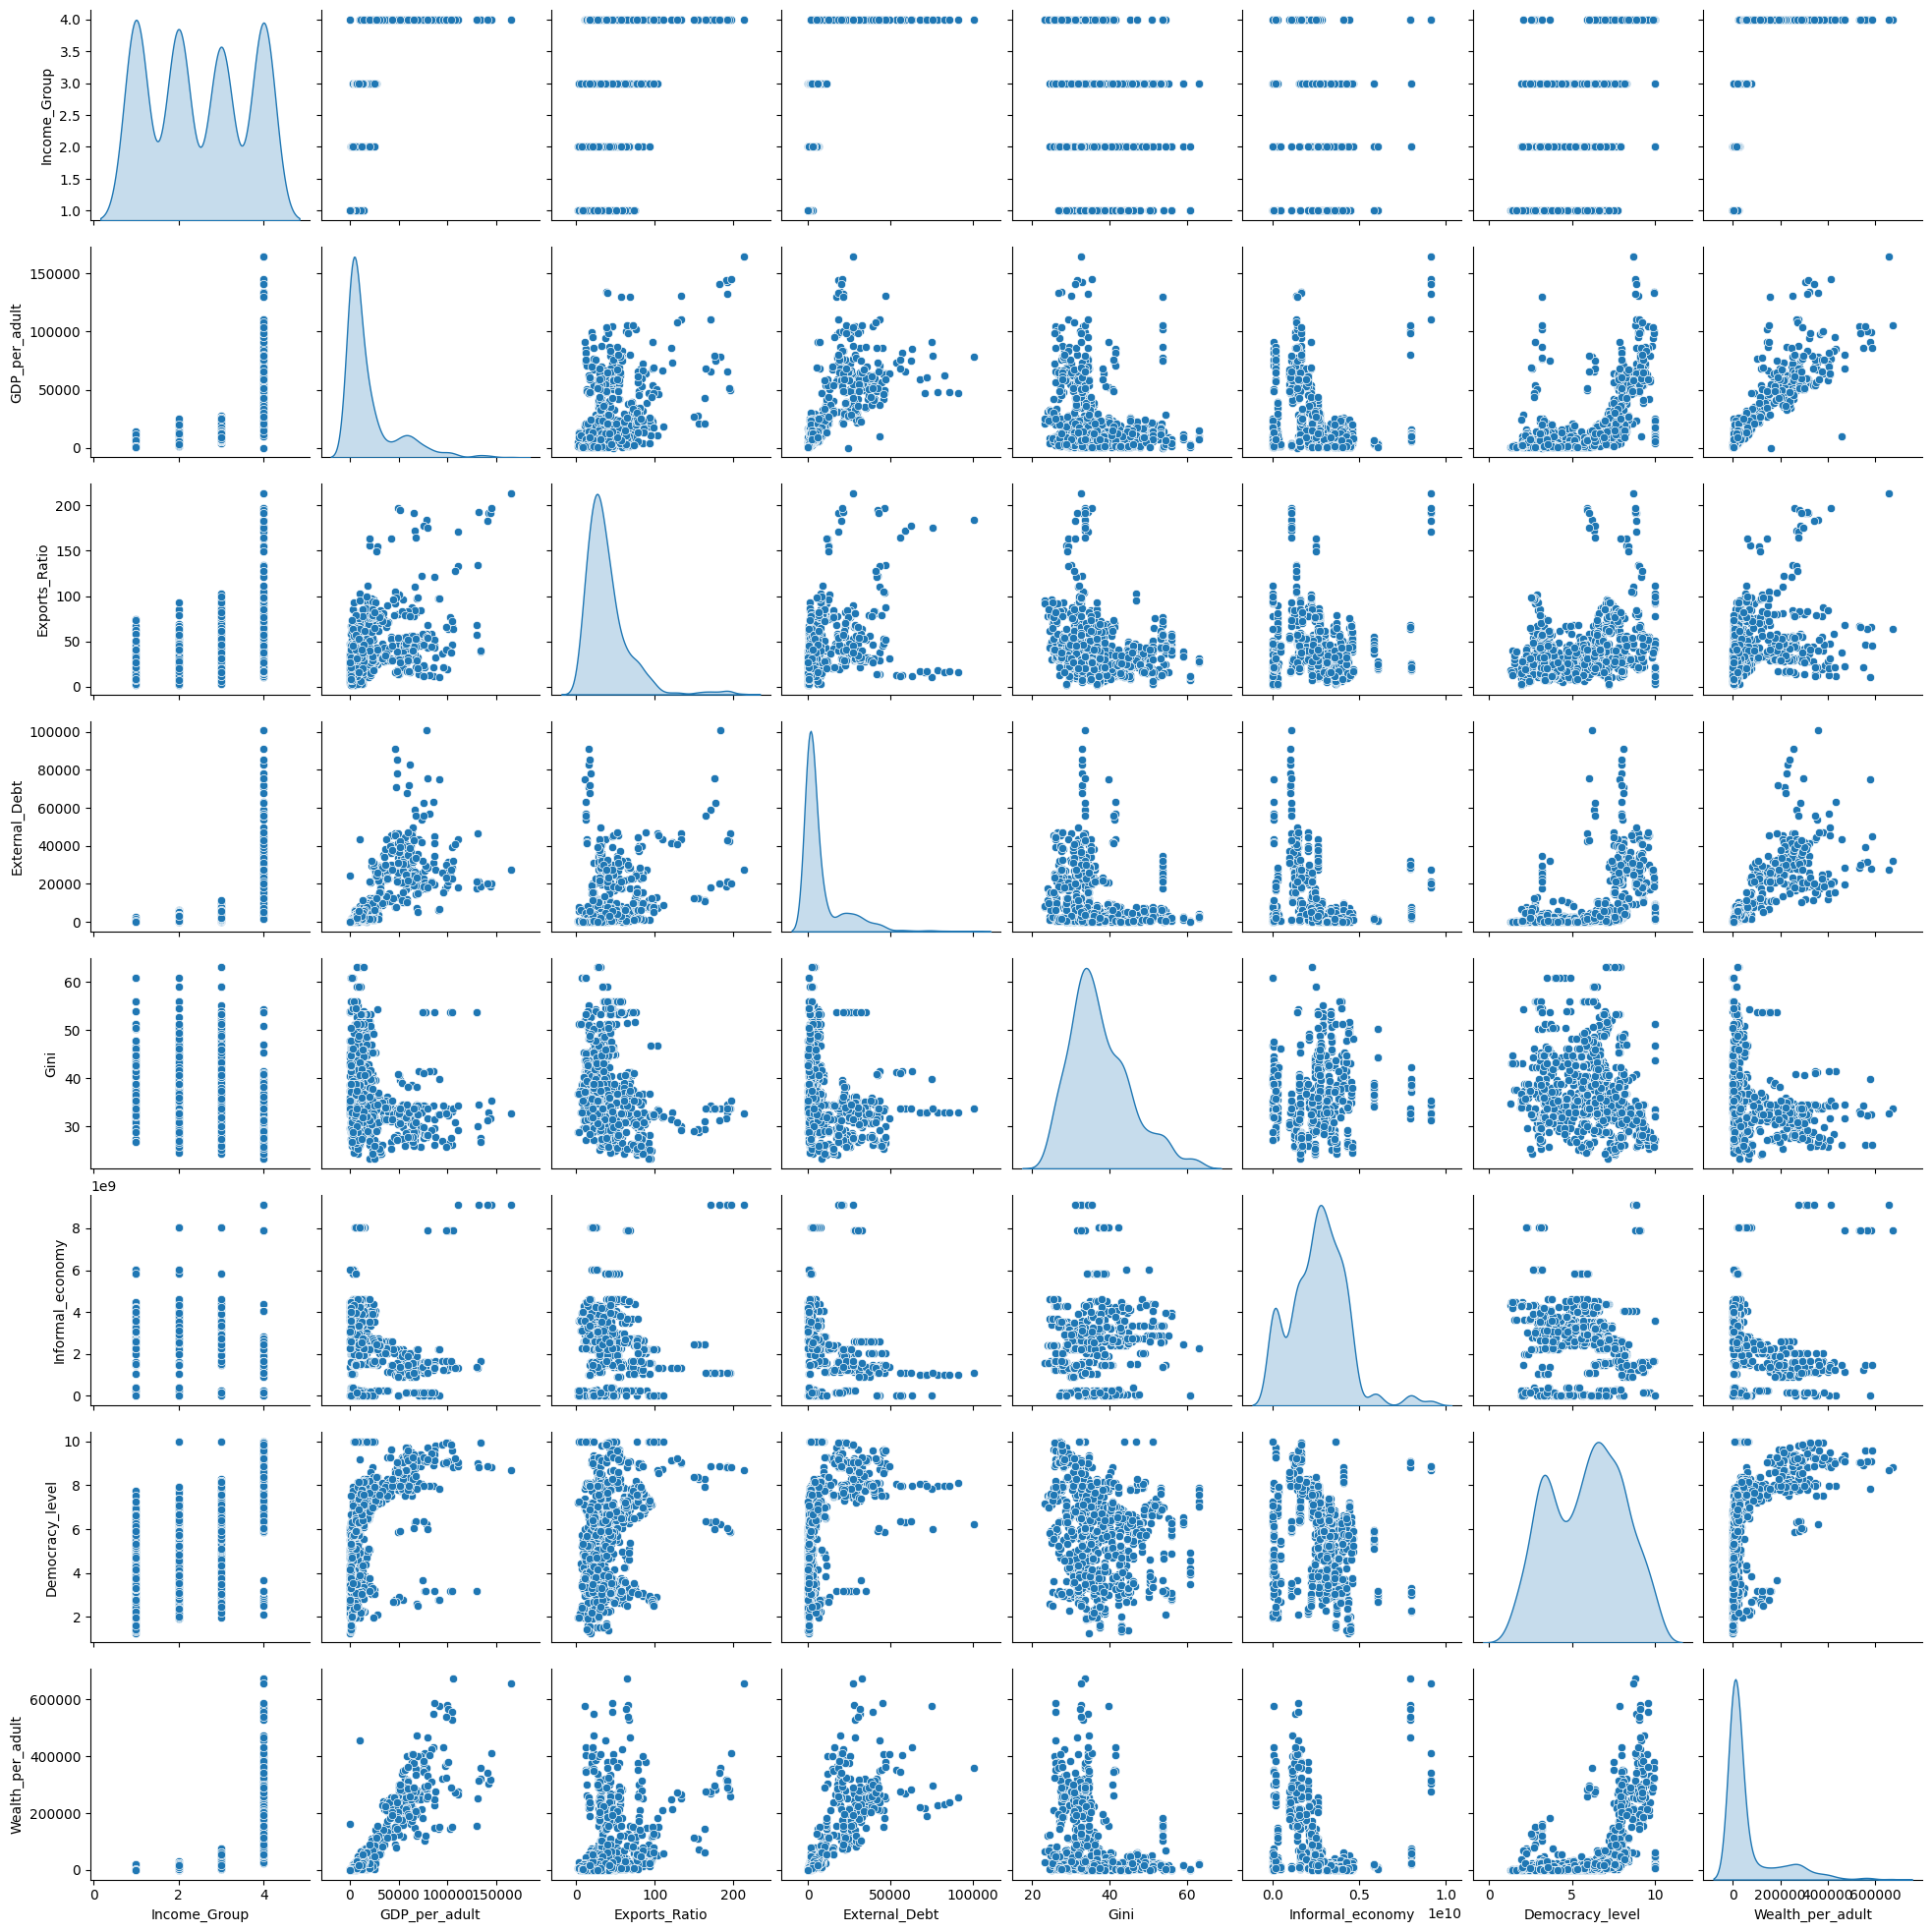

In [70]:
sns.pairplot(train_dataset_reg[["Income_Group","GDP_per_adult","Exports_Ratio","External_Debt","Gini","Informal_economy","Democracy_level","Wealth_per_adult"]], diag_kind="kde")

In [71]:
train_stats = train_dataset_reg.describe()
train_stats.pop("Wealth_per_adult")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Income_Group,1118.0,2.483005e+00,1.138241e+00,1.00,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
GDP_per_adult,1118.0,1.909158e+04,2.612584e+04,132.00,2.545750e+03,7.969000e+03,2.237325e+04,1.646810e+05
Exports_Ratio,1118.0,3.913854e+01,2.890249e+01,2.14,2.140900e+01,3.140400e+01,4.715425e+01,2.132230e+02
External_Debt,1118.0,8.102089e+03,1.348170e+04,57.00,5.605000e+02,2.010500e+03,7.957750e+03,1.007950e+05
Gini,1118.0,3.759176e+01,7.899240e+00,23.23,3.205750e+01,3.592000e+01,4.243000e+01,6.303000e+01
Democracy_level,1118.0,5.846932e+00,2.212316e+00,1.26,3.822500e+00,6.040000e+00,7.642500e+00,1.000000e+01
Informal_economy,1118.0,2.615749e+09,1.610775e+09,17.00,1.538433e+09,2.642628e+09,3.573961e+09,9.136214e+09


In [72]:
train_labels = train_dataset_reg.pop('Wealth_per_adult')
test_labels = test_dataset_reg.pop('Wealth_per_adult')

In [73]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset_reg)
normed_test_data = norm(test_dataset_reg)

In [74]:
normed_test_data

,Income_Group,GDP_per_adult,Exports_Ratio,External_Debt,Gini,Democracy_level,Informal_economy
21,-0.424344,-0.512388,-0.205122,-0.579236,0.444123,-0.911684,0.093820
52,-1.302892,-0.176438,-0.381093,-0.414495,1.731589,-1.106050,0.883352
53,-0.424344,-0.380871,-0.350646,-0.405148,1.731589,-1.006607,0.883352
54,-0.424344,-0.349638,0.058731,-0.411750,1.731589,-1.006607,0.883352
57,-0.424344,-0.525479,0.297776,-0.482958,1.731589,-1.119610,0.883352
...,...,...,...,...,...,...,...
2093,-0.424344,-0.692402,-1.051209,-0.566033,-0.111626,-1.761472,-1.469520
2096,-1.302892,-0.651408,-1.235137,-0.573451,-0.111626,-1.761472,-1.469520
2103,-0.424344,-0.602759,-0.040880,-0.526127,2.322785,-0.107097,0.837164
2104,-0.424344,-0.610529,-0.155784,-0.516930,2.322785,-0.342145,0.837164


In [75]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset_reg.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [76]:
model_reg = build_model()

In [77]:
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                512       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
example_batch = normed_train_data[:10]
example_result = model_reg.predict(example_batch)
example_result

1/1 [==============================] - 0s 131ms/step


array([[-0.08752044],
       [ 0.031739  ],
       [-0.01958416],
       [-0.22597823],
       [-0.02126122],
       [-0.04830406],
       [ 0.00110689],
       [-0.0527529 ],
       [-0.1042577 ],
       [ 0.02707525]], dtype=float32)

In [79]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 3000

history = model_reg.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
2995,535742848.0,10611.833008,535742848.0,472606432.0,11928.763672,472606432.0,2995
2996,531847360.0,10603.158203,531847360.0,489250240.0,12085.041992,489250240.0,2996
2997,527998880.0,10624.149414,527998880.0,463534336.0,11892.143555,463534336.0,2997
2998,531869568.0,10643.317383,531869568.0,464154144.0,11889.319336,464154144.0,2998
2999,532688512.0,10605.959961,532688512.0,465282400.0,11902.100586,465282400.0,2999


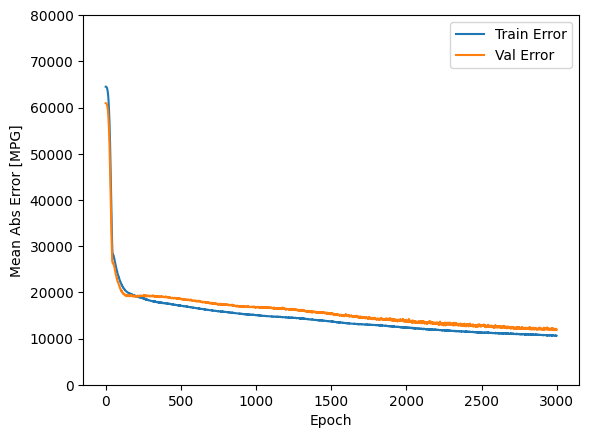

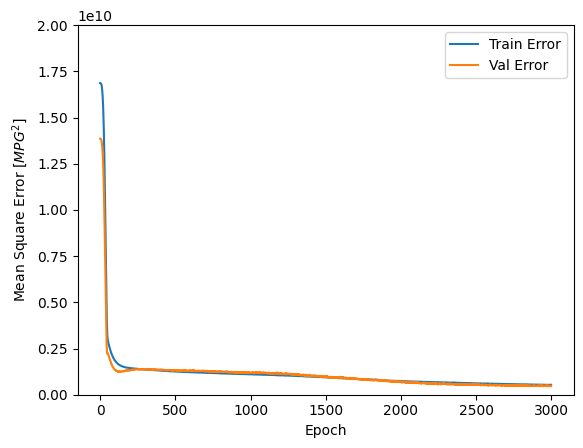

In [81]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,80000])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20000000000])
    plt.legend()
    plt.show()


plot_history(history)

In [82]:
url2 = 'https://raw.githubusercontent.com/jufemachado/TFM/main/Dataset_tfm_v2.csv'
dataset_json = pd.read_csv(url2, sep= ';')
dataset_json

,Country,Period,Region,Income_Group,GDP_per_adult,Population,Exports,Exports_Ratio,External_Debt,Main_export,Class,Gini,Average_Wage,Exp_Education,Democracy_level,Informal_economy,Wealth_per_adult,Range
0,Afghanistan,2012,Asia-Pacific,Low-income,599.0,14601059.0,11010439.8,2.110,41.0,Gold,Mining,41.00,380.0,2.60420,2.48,NaN,NaN,NaN
1,Afghanistan,2013,Asia-Pacific,Low-income,627.0,14748545.0,11849016.3,2.550,39.0,Gold,Mining,41.00,380.0,3.45446,2.48,NaN,NaN,NaN
2,Afghanistan,2014,Asia-Pacific,Low-income,1484.0,14897520.0,10045505.2,2.770,49.0,Gold,Mining,41.00,380.0,3.69522,2.77,NaN,NaN,NaN
3,Afghanistan,2015,Asia-Pacific,Low-income,1539.0,15048000.0,9572954.3,2.850,58.0,Gold,Mining,41.00,380.0,3.25580,2.77,NaN,NaN,NaN
4,Afghanistan,2016,Asia-Pacific,Low-income,1604.0,15200000.0,9004515.5,3.310,47.0,Gold,Mining,41.00,380.0,4.54397,2.55,NaN,2500.0,Bet_1000_5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Zimbabwe,2017,Africa,Low-income,2074.0,7967033.0,3550740.6,19.659,972.0,Gold,Mining,44.34,1710.0,5.81878,3.16,60.429035,3640.0,Bet_1000_5000
2113,Zimbabwe,2018,Africa,Low-income,2515.0,8084577.0,3935783.6,26.164,1059.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,3216.0,Bet_1000_5000
2114,Zimbabwe,2019,Africa,Low-income,2893.0,8238276.0,3272076.8,27.554,1247.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,4734.0,Bet_1000_5000
2115,Zimbabwe,2020,Africa,Lower-middle-income,3048.0,7151872.0,3923835.5,22.293,1269.0,Gold,Mining,50.26,1710.0,2.05049,3.16,60.429035,7131.0,Bet_5000_10000


In [83]:
##dataset_json.to_json('C://Users//Felipe//OneDrive//Documentos//Documentos_Felipe//Maestria//TFM//TFM_v1.json', orient='records')